This module deals with fitting of a function to a data and finding the location of the minimum value. 

This example can be used for slices of huge data or images (template matching) where finding the minimum value and location can be difficult or is dynamically obtained when the required pattern is in motion.

- Libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math

import scipy.optimize as optimization

import cv2

import warnings
warnings.filterwarnings('ignore')




- Hypothethical data

In [2]:
# Random values in parabolic fashion
xdata = np.array([89,70,64,50,30,21,8,0,-10,-5,0,12,23,45,80,85,100])
ydata = np.arange(len(xdata))

x = ydata


- Quadratic Fitting of data to a function. 

In [3]:
def func(x, a, b, c):
    '''
    Description: This function takes in a value of array containing the indices(x), coeffecients a, b and c and perform 
    fitting of data to the mentioned function
    
    Arguments:
    
    x - a numerical value of x 
    a - coeffecient of function (float)
    b - coeffecient of function (float)
    c - coeffecient of function (float)
    
    Returns:
    
    a + b*x + c*x*x - a numerical array containing the fit of the data
    
    '''
        
    return a + b*x + c*x*x

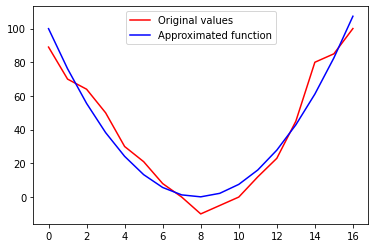

In [4]:
# Initial guess for coeffecients of a quadratic equation.
x0    = np.array([0.0, 0.0, 0.0])

popt, pcov = optimization.curve_fit(func, ydata, xdata, x0)
data = func(ydata,*popt)

plt.plot(xdata,'-r',label="Original values")
plt.plot(data,'-b',label="Approximated function")
plt.legend()
plt.show()

- Deriavative of function

In [5]:
def deriv(x,a,b,c):
    '''
    Description: This function takes in a values of list containing the present and previous values of x, coeffecients 
    a, b and c and calculates deriavative of the function. The deriavative is calculated dynamicaly. This in useful in 
    applications like template matching in computer vision where intensity of the spot in unknown but the underlying function 
    is unknown. Hence func(*var) simulates that. Note: if maximum value 
    
    Arguments:
    
    x - a numerical value of x 
    a - coeffecient of function (float)
    b - coeffecient of function (float)
    c - coeffecient of function (float)
    
    Returns:
    
    (func(x[-1], a, b, c)-func(x[-2], a, b, c))/(x[-1]-x[-2]) - a numerical array containing the derivative of the data
    
    '''  
    
    
    x_deriv = (func(x[-1], a, b, c)-func(x[-2], a, b, c))/(x[-1]-x[-2])
    
    
    
    return x_deriv

- Gradient Descent

In [6]:
# https://www.tech-quantum.com/implementation-of-gradient-descent-in-python/
# https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html

def LS_GradDesc(x_curr, step, precision, a, b, c,l_r):
    
    '''
    Description: Line search for minima using gradient descent and display the corresponding search
    
    Arguments:
    
    x_curr - Initial numerical value (float)
    step -  step size (float)
    precision - Precison for the func(x_new) to reach minima (float)
    a - coeffecient of function (float)
    b - coeffecient of function (float)
    c - coeffecient of function (float)
    l_r - learning rate (float)
    
        
    '''
     
    x_prev_check = 0 # Counter reference value to stop loop
    x_list = []
    y_list = []
    
    while abs(x_curr - x_prev_check) > precision:
        
        x_prev_check = x_curr
        
        if len(x_list)==0:
            x_list.append(x_curr)
            x_list.append(x_curr+step)
            
        if len(y_list)==0:
            
            y_list.append(func(x_curr,a,b,c))
            y_list.append(func(x_curr+step,a,b,c))         
       
            
        x_curr = x_list[-1] - l_r * deriv(x_list,a,b,c)         
        
        y_curr = func(x_curr,a,b,c)
        x_list.append(x_curr)
        y_list.append(y_curr)     
    
        # Step by step trajectory of increments  
        plt.scatter(x_list,y_list,c ='b',label="Trajectory during minimisation")
        plt.plot(x_list,y_list,'b')
        plt.plot(data,'-r',label="Original function")
        plt.legend()
        plt.show()  
    

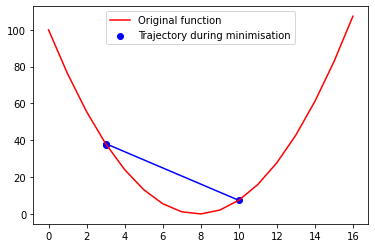

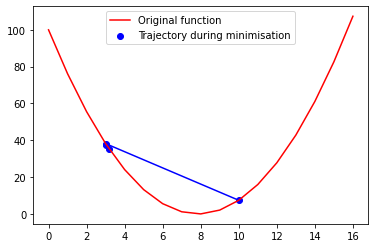

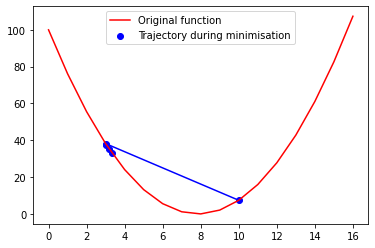

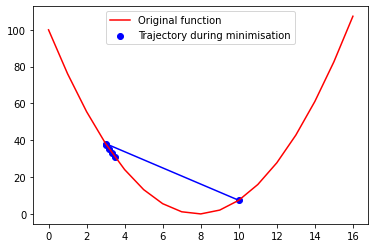

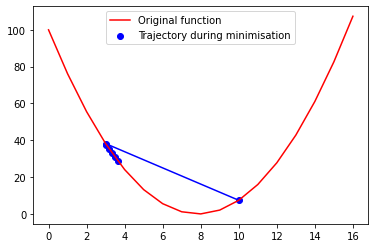

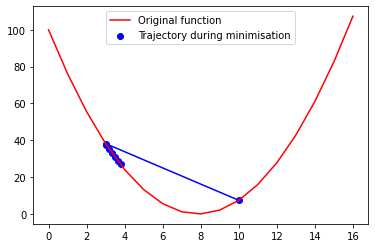

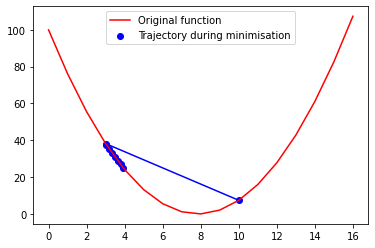

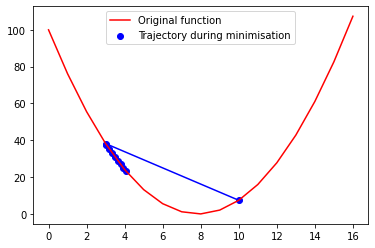

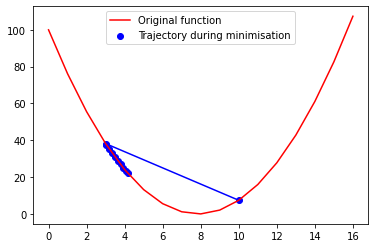

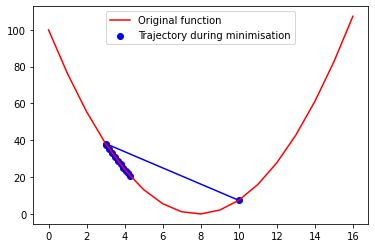

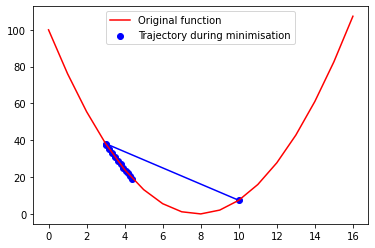

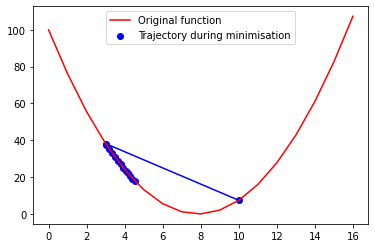

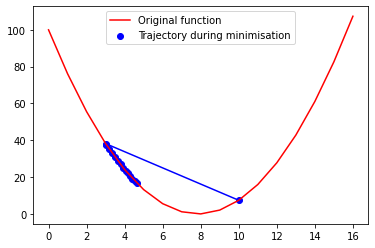

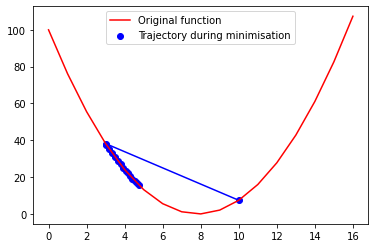

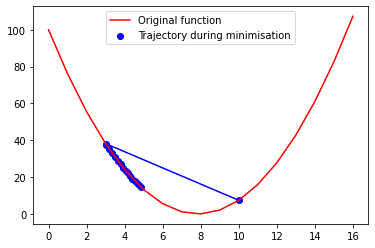

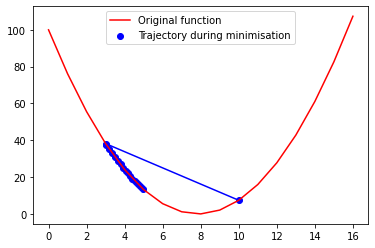

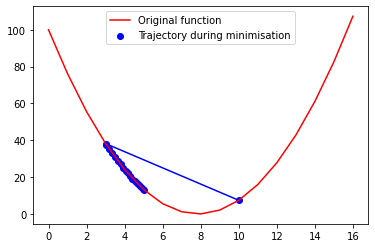

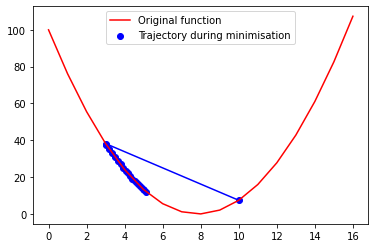

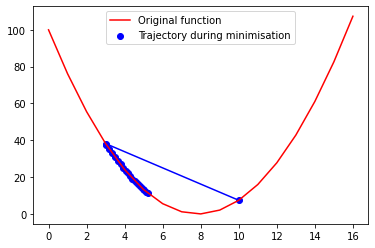

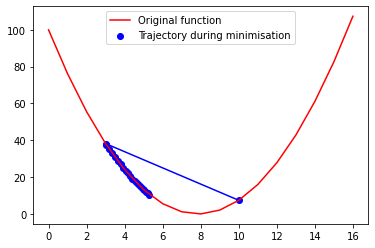

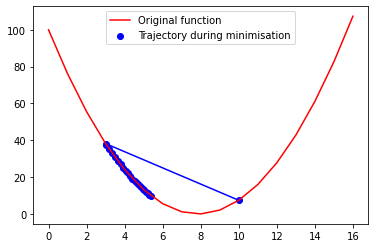

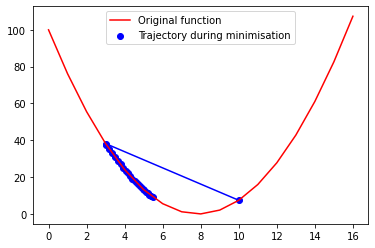

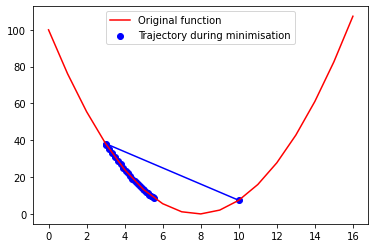

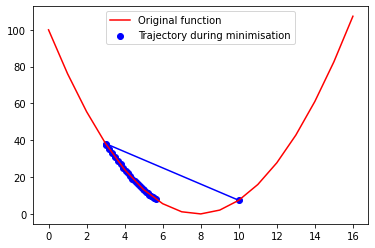

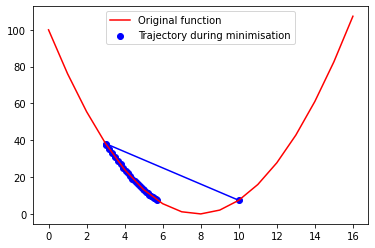

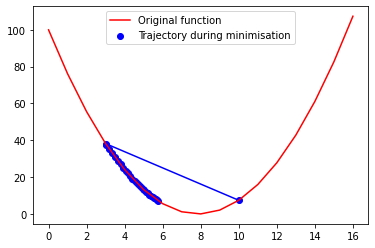

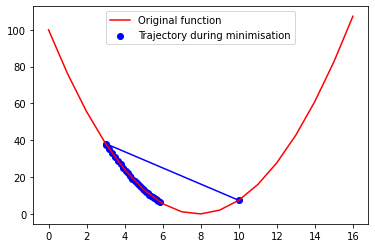

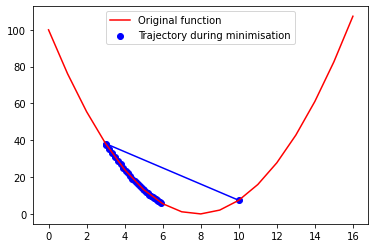

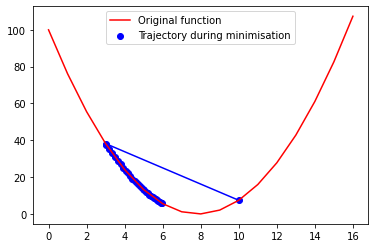

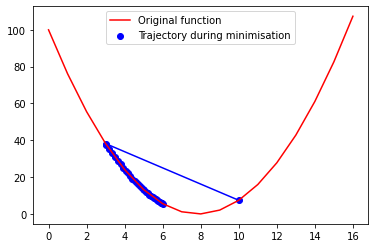

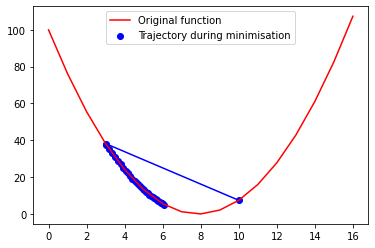

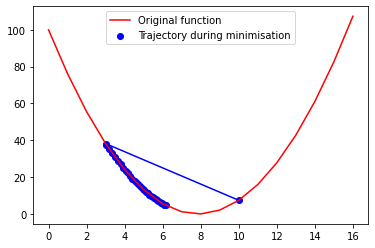

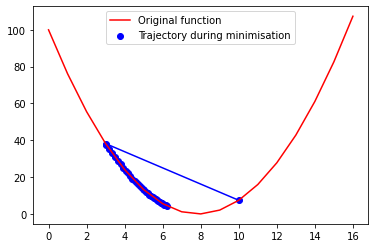

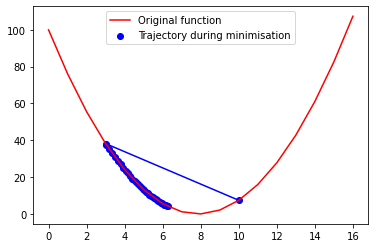

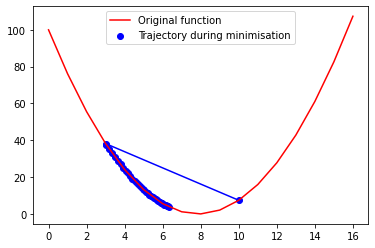

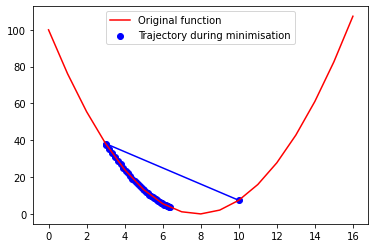

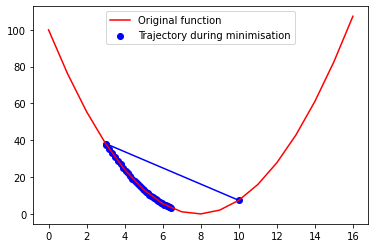

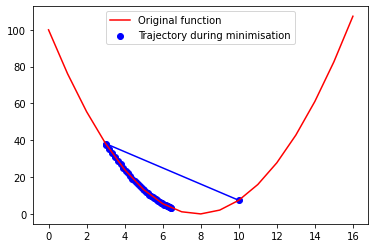

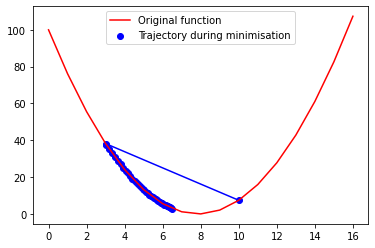

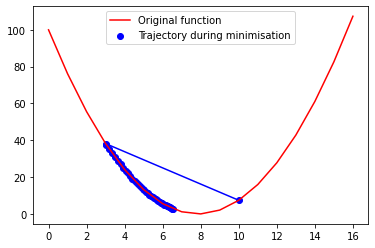

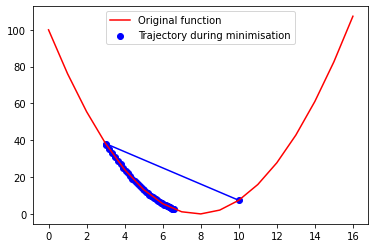

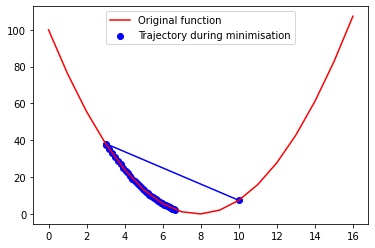

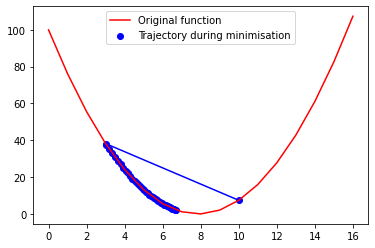

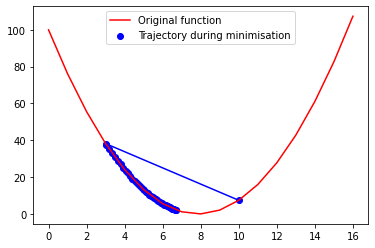

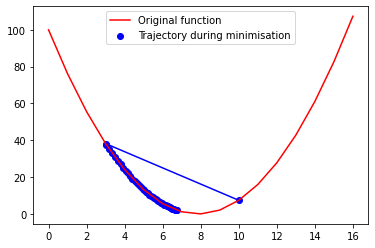

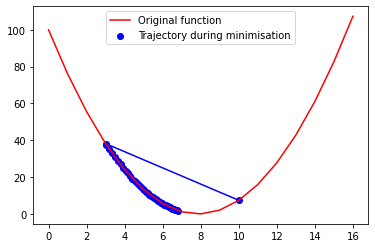

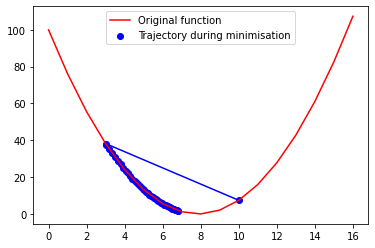

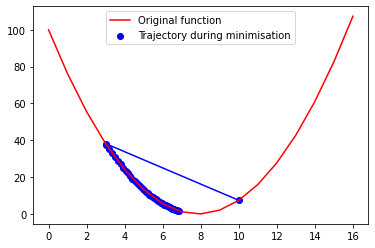

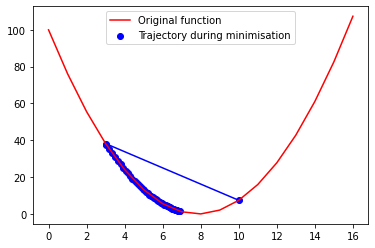

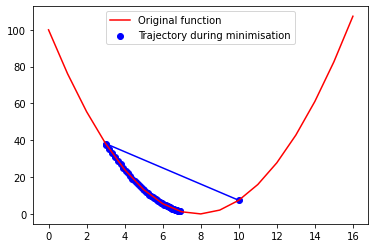

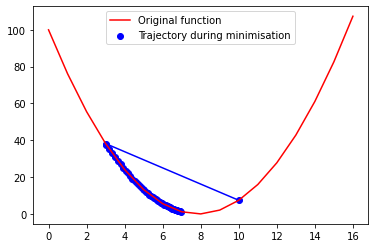

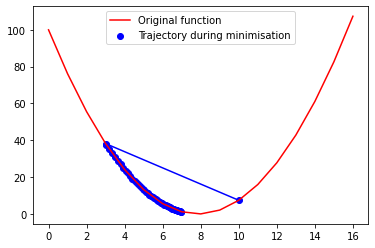

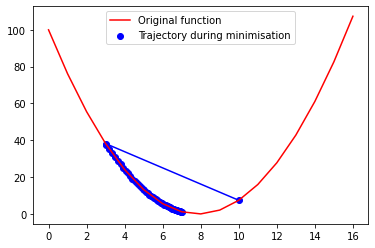

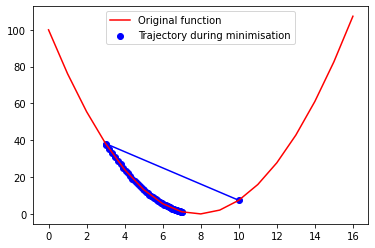

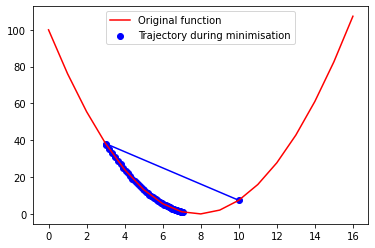

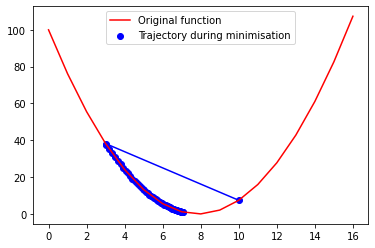

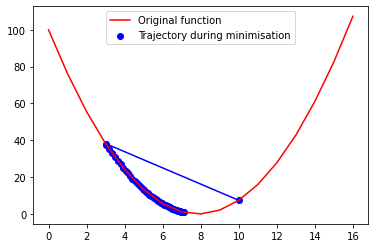

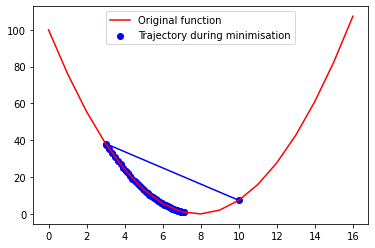

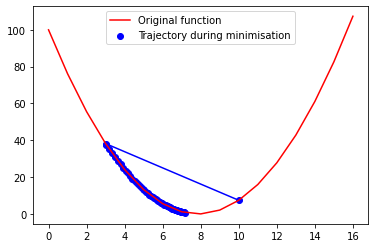

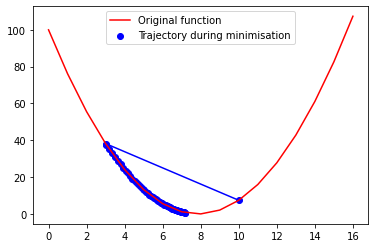

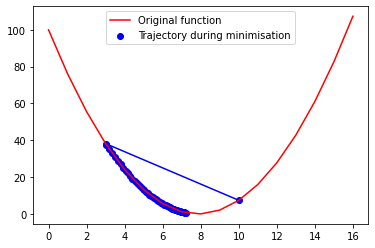

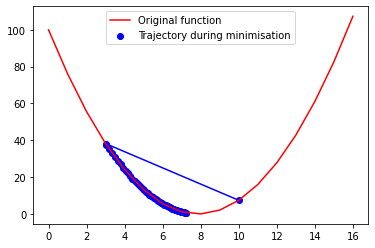

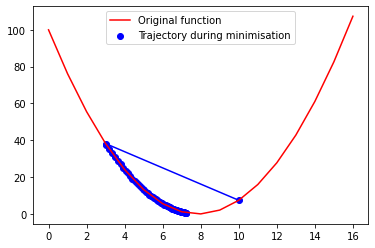

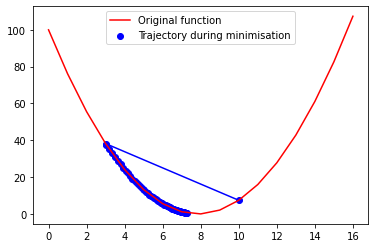

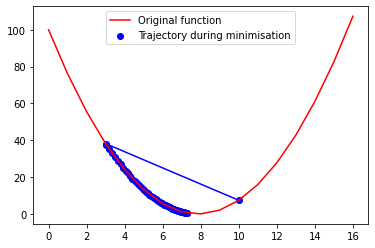

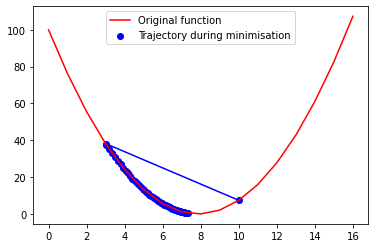

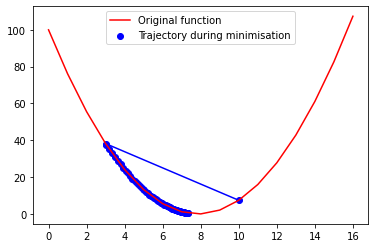

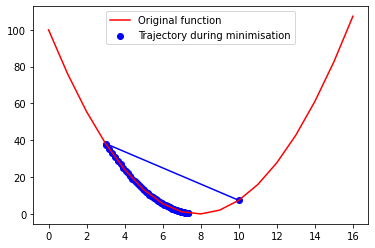

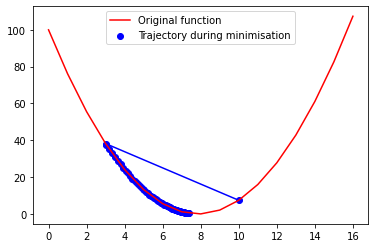

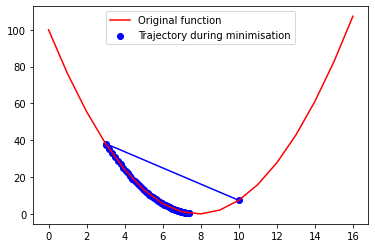

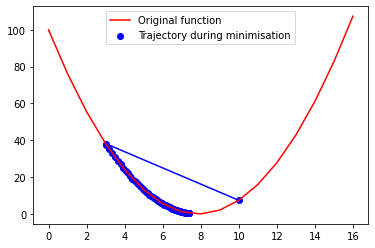

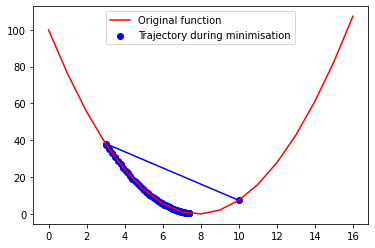

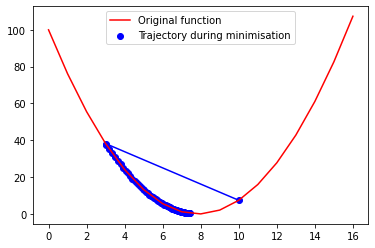

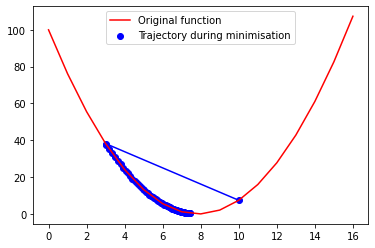

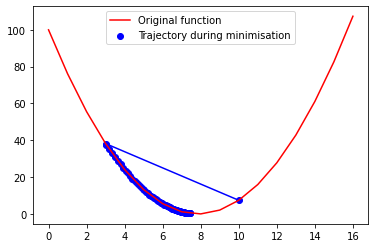

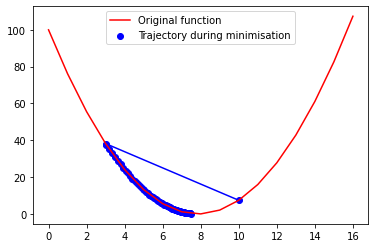

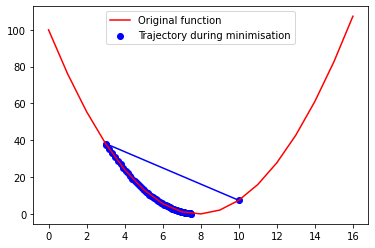

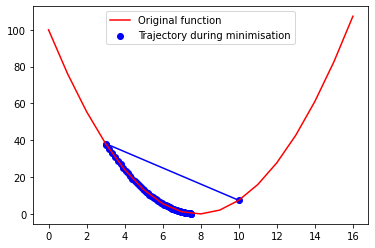

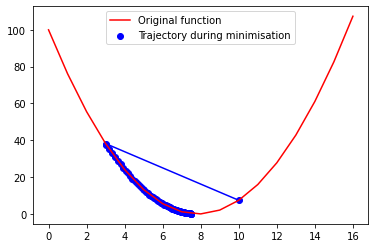

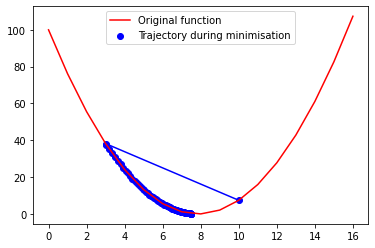

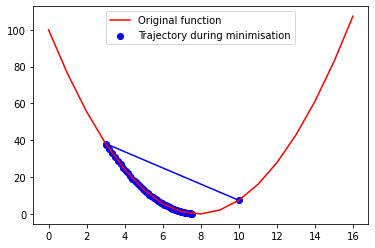

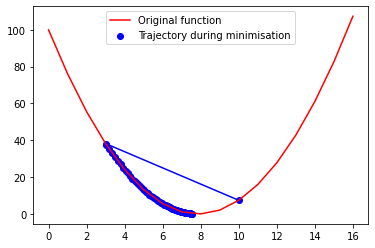

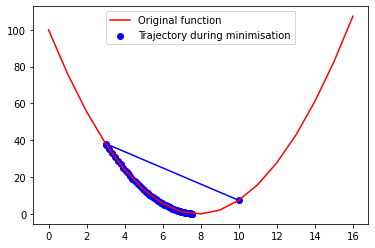

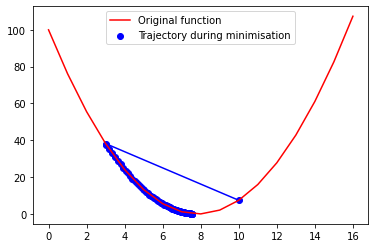

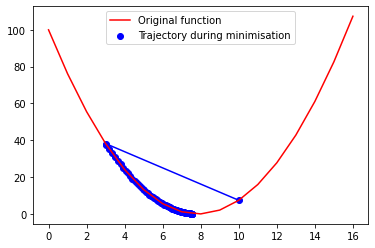

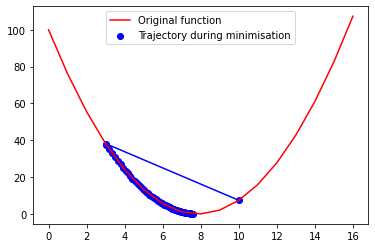

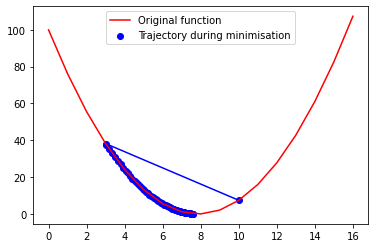

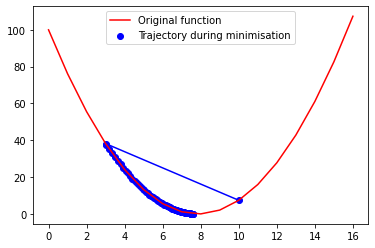

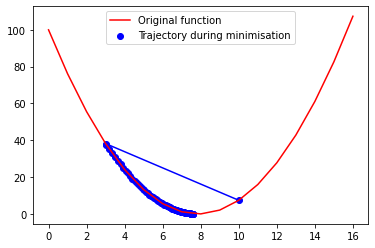

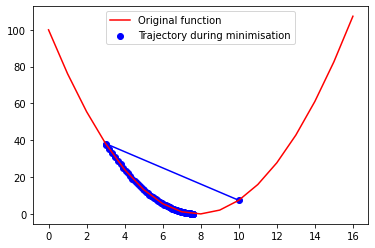

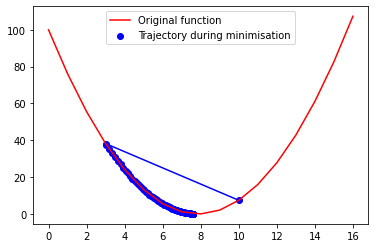

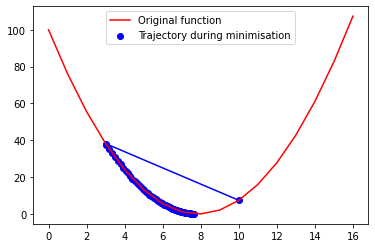

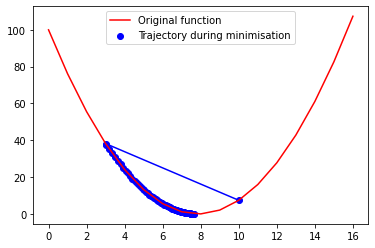

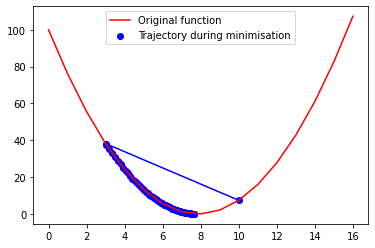

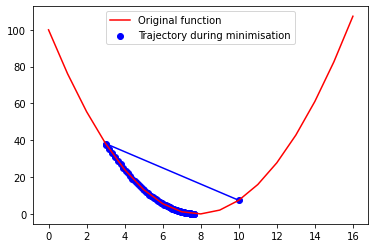

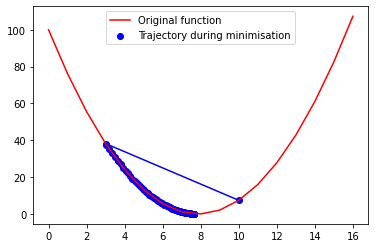

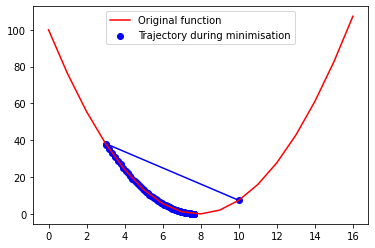

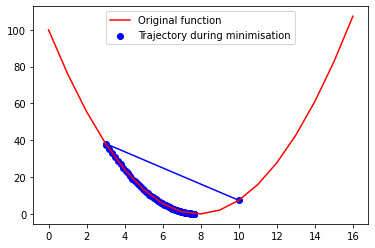

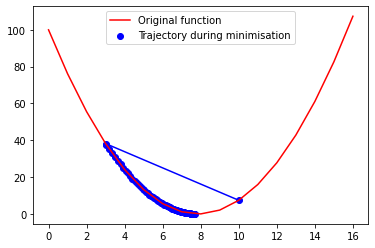

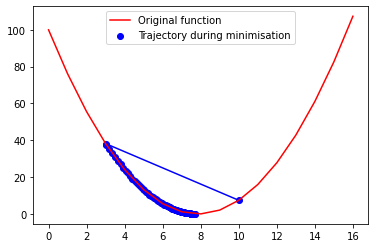

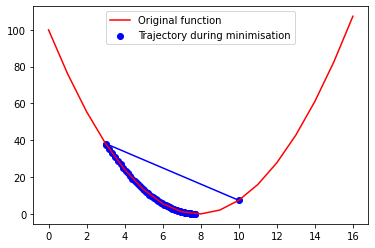

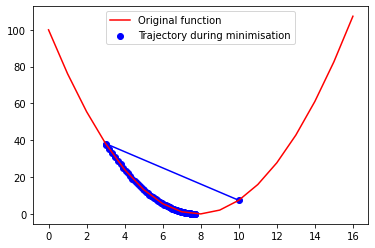

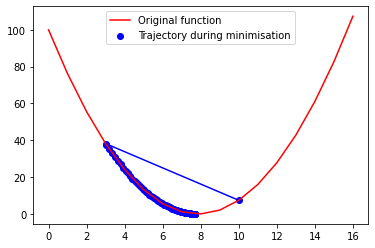

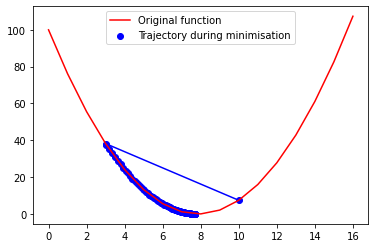

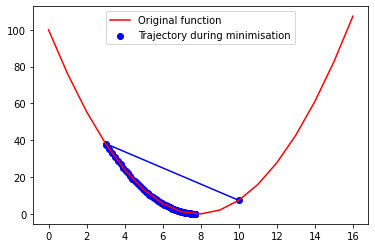

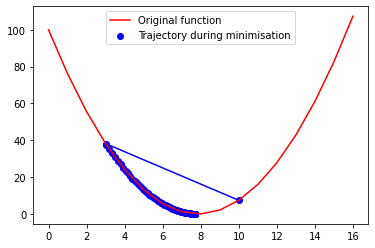

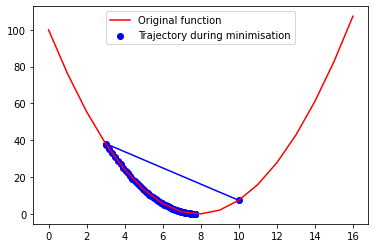

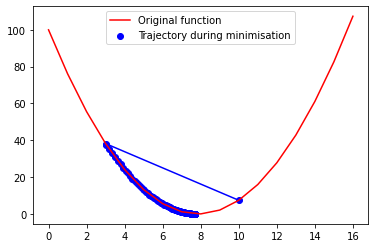

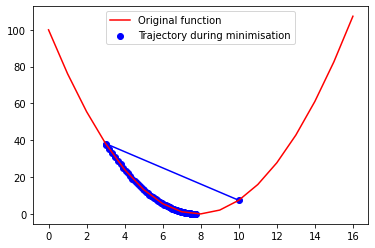

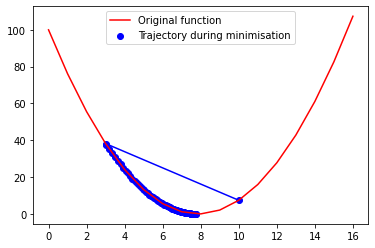

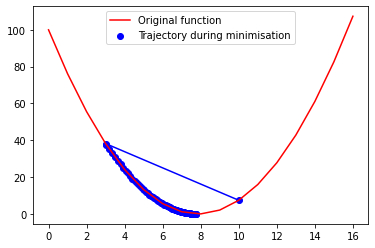

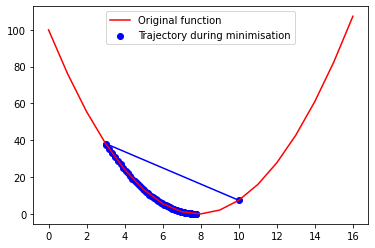

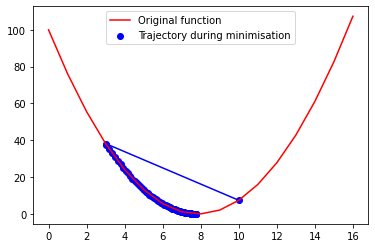

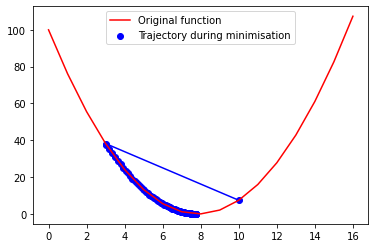

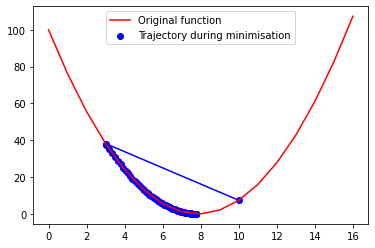

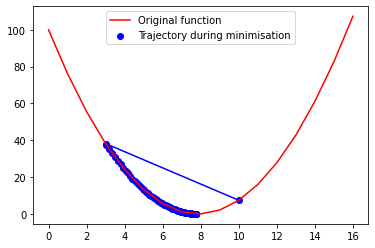

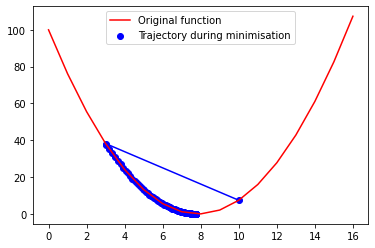

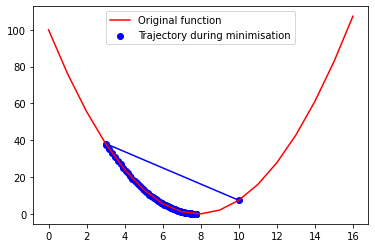

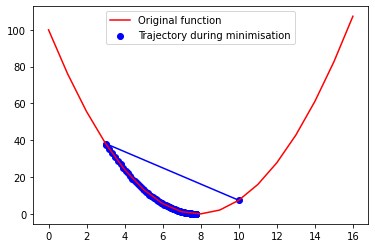

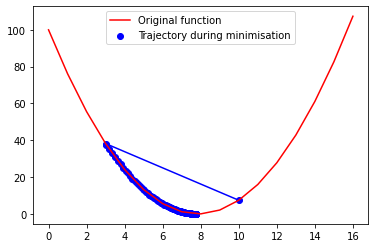

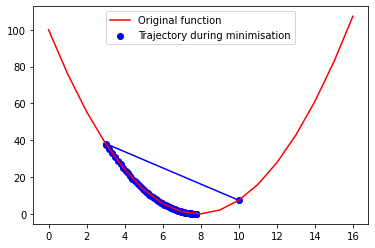

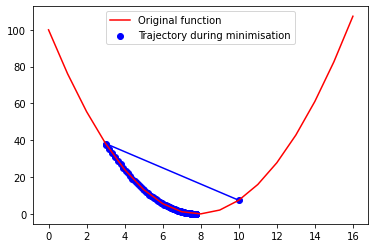

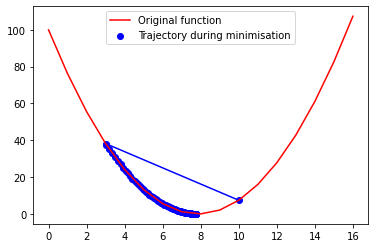

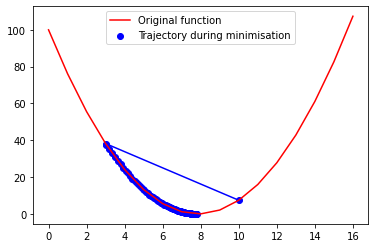

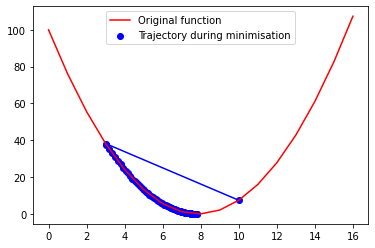

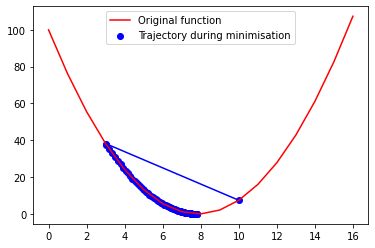

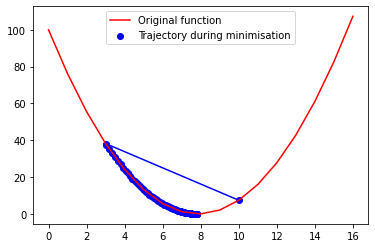

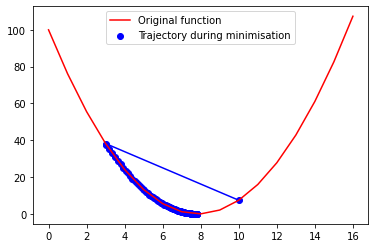

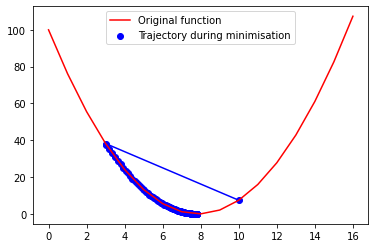

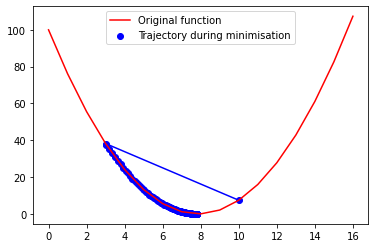

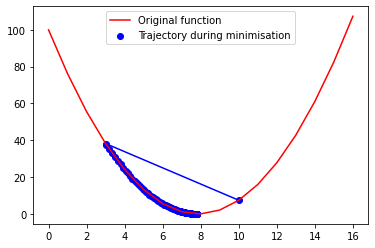

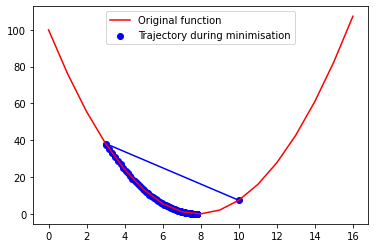

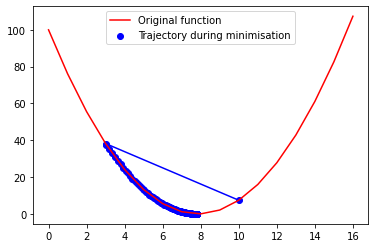

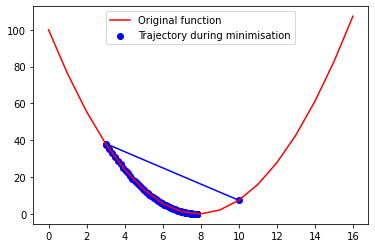

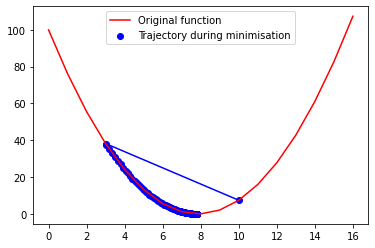

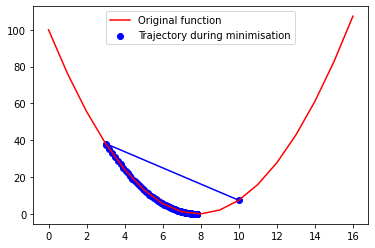

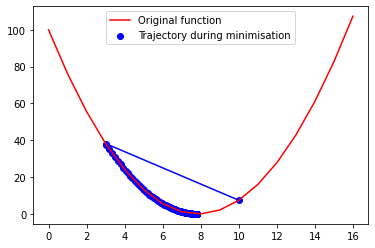

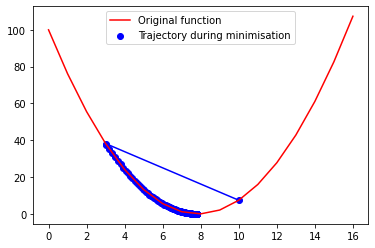

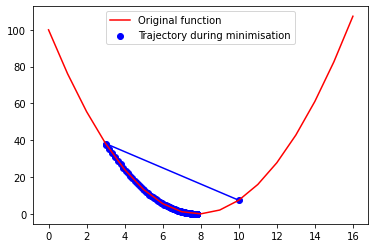

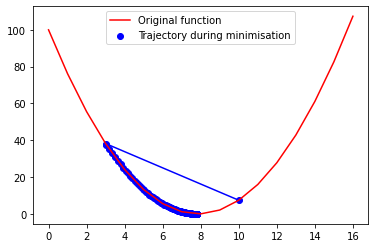

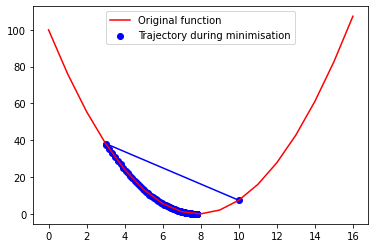

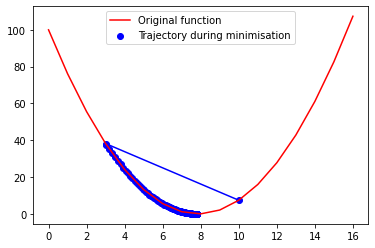

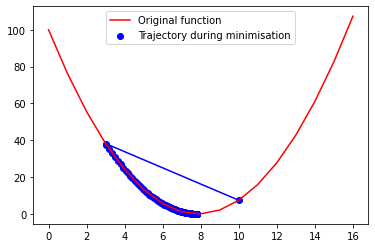

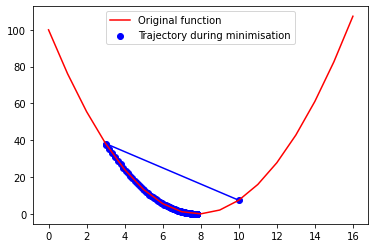

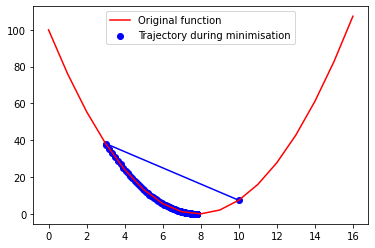

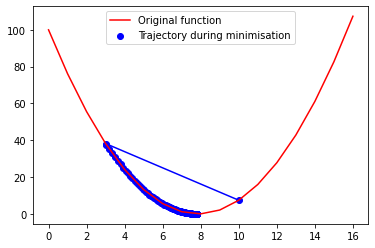

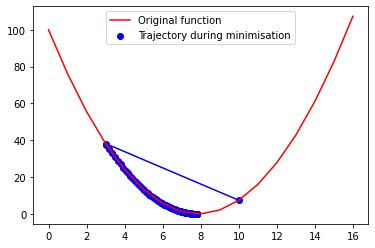

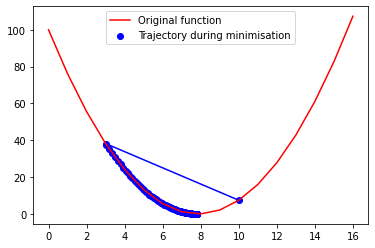

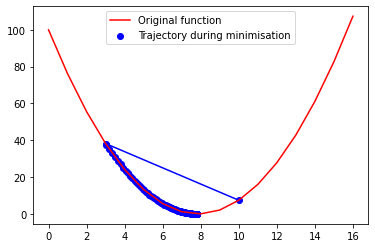

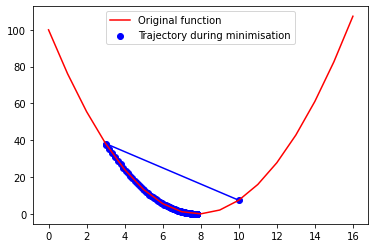

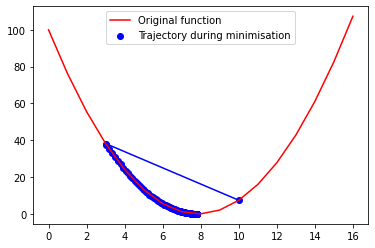

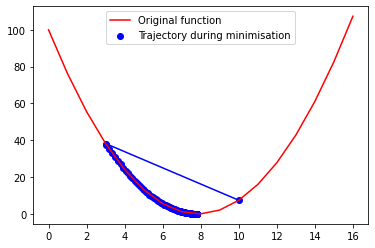

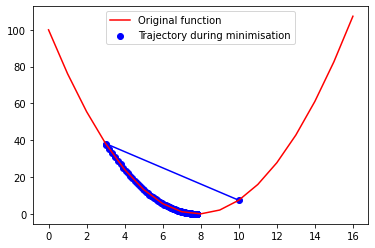

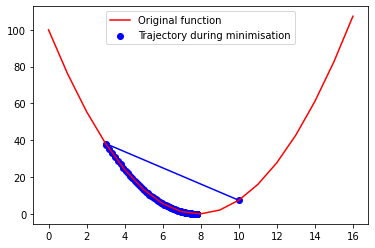

In [7]:
# Implement gradient descent (all the arguments are arbitrarily chosen except coeffecients)
LS_GradDesc(10, -7.0, 0.001,popt[0],popt[1],popt[2],l_r= 0.01)
